In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = (pd.read_excel("P4 stopp last 13 month.xlsx").drop(index=0)).reset_index()
del df['index']
len(df)  # 52710 rows
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559000,31.276667,2023-02-10 12:10:09.178000,00:31:16.600000,Okategoriserat,NaN,NaN
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469000,7.64,2023-02-10 11:02:53.886000,00:07:38.400000,Okategoriserat,NaN,NaN
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234000,1.031667,2023-02-10 10:53:54.154000,00:01:01.900000,Mikrostopp,NaN,NaN
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449000,0.163333,2023-02-10 10:50:15.225000,00:00:09.800000,Mikrostopp,NaN,NaN
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245000,1.555,2023-02-10 10:49:31.590000,00:01:33.300000,Okategoriserat,NaN,NaN


In [3]:
df['Start time'] = df['Start time'].astype('datetime64')
df['Minutes'] = df['Minutes'].astype('float')
df['Stoptime'] = df['Stoptime'].astype('datetime64')

In [4]:
#check missing value or error value and decide how to revise them 
df = df.replace({'-': None})
df.dtypes
df.isnull().sum()

Machine               0
Ordernumber        1336
Article             369
Atriclenumber       369
Type               1424
Workshift             0
Start time            0
Minutes               0
Stoptime              0
Total stoptime        0
Stopcause             0
Station           44940
Comment           51085
dtype: int64

In [6]:
# Filling missing values with above cells
#df_1 = df.fillna(method='ffill')
#df.isnull().sum()

In [5]:
df["month"] = pd.to_datetime(df["Stoptime"], format='%Y-%m-%d %H:%M:%S').dt.month
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2


In [6]:
df["day"] = df["Stoptime"].dt.day
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2,10
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2,10
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2,10
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2,10
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2,10


## Reclassify stop causes

In [37]:
# Based on stop cause explanation file
def reclassify_stopcause(dataframe):
    dataframe["Stopcause"] = dataframe["Stopcause"].replace(["Lunch", "Rast", "Upplärning ny operatör", 
                                                             "Förbättringsgrupp", "Veckomöte", 
                       "Annan utbildning/möte", "Fackmöte", "Företagsinformation", "Planerad omställning", 
                       "Avslut av order", "Oplanerad omställning", "Uppstart av maskin", 
                       "Första / sistabitskontroll / timkontroll"],'Planerat stop')
    
    return dataframe
                                  

In [38]:
df_reclassify = reclassify_stopcause(df)
df_reclassify

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day,encoded_stopcause
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2,10,14
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2,10,14
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2,10,13
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2,10,13
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:22:36.000,0.018333,2022-02-01 04:22:37.100,00:00:01.100000,Mikrostopp,NaN,NaN,2,1,13
51706,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:23:03.000,0.043333,2022-02-01 04:23:05.600,00:00:02.600000,Mikrostopp,NaN,NaN,2,1,13
51707,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:33:49.000,0.101667,2022-02-01 04:33:55.100,00:00:06.100000,Mikrostopp,NaN,NaN,2,1,13
51708,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:35:10.000,52.310000,2022-02-01 05:27:28.600,00:52:18.600000,Väntar på annan maskin,NaN,NaN,2,1,34


# Unique values and counts in the columns

In [116]:
df.columns

Index(['Machine', 'Ordernumber', 'Article', 'Atriclenumber', 'Type',
       'Workshift', 'Start time', 'Minutes', 'Stoptime', 'Total stoptime',
       'Stopcause', 'Station', 'Comment'],
      dtype='object')

## Unique count

In [117]:
# unique values for column: article, article number, type, workshift, stop cause
df.Machine.unique() # We have just one machine type "P4" and no missing
len(df.Ordernumber.unique())   # 223 order number 
len(df.Article.unique())     # 44 article
len(df.Atriclenumber.unique())  # 46 article number
len(df.Type.unique())  # 2 types which  are 'Default' and 'Roller'
len(df.Workshift.unique())  # 4 shifts  which are Förmiddag', 'Eftermiddag', 'Natt', 'Övertid helg
len(df.Stopcause.unique())  # 46 causes of stop
len(df.Station.unique())   # 44 stations
df['Start time'].dt.year.unique()

array([2023, 2022], dtype=int64)

## Unique value

In [9]:
df_reclassify['Article'].unique()

array(['MINIR POLYAMID 10CM SPECIALBEHANLAD', None,
       'MINIR FILT 10 CM SPECIALBEHANDLAD', 'Tillfälligt artikelnummer',
       'MINIR ANLON 10CM GAV VIT LAGR TRANSP.',
       'MINIR ELON 10CM GAV VIT LAGR TRANSP',
       'MINIR RILON 10 CM GAV VIT LAGR TRANSP',
       'MINIR RILON 10CM GAV GR� LAGR TRANSP',
       'MINIR FILT 15 CM SPECIALBEHANDLAD',
       'MINIR ANTEX 15CM GAV GR� LAGR TRANSP',
       'MINIR RIMAX 15CM GAV GR� LAGR TRANSP',
       'MINIR MICMEX 15CM GAV GR� LAGR TRANSP',
       'MINIR 15 CM GAV GR� LAGR TRANSP',
       'MINIR FILT 5CM GAV GR� LAGR TRANSP KORT',
       'MINIRULLE ANTEX 5CM GAV GR� LAGR VIT',
       'MINIR MICROF 10CM GAV VIT LAGR TRANSP **',
       'MINIR ANLON 10CM GAV GR� LAGR TRANSP',
       'MINIR RIMAX 10CM GAV GR� LAGR TRANSP',
       'Antex - Sasol prov med Borealis recept', 'Antex - Borealis prov',
       'MINIR FILT 15CM GAV GR� LAGR TRANSP',
       'MINIR MICMEX 10CM GAV VIT LAGR TRANSP',
       'MINIR MICMEX 10CM GAV GR� LAGR TRANSP',


In [10]:
df_reclassify['Type'].unique()

array(['Default', None, 'Roller'], dtype=object)

In [11]:
df_reclassify['Workshift'].unique()

array(['Förmiddag', 'Eftermiddag', 'Natt', 'Övertid helg'], dtype=object)

In [12]:
df_reclassify['Stopcause'].unique()

array(['Okategoriserat', 'Mikrostopp', 'Reparatör på plats',
       'Planerat stop', 'Städning', 'Tömning (Endast påläggsmaskiner)',
       'Mekaniskt fel', 'Väntar på annan maskin', 'Påfyllning material',
       'Annan utbildning/möte', 'Kvalitetsproblem', 'Vision',
       'Väntar på underhåll', 'Support vid annan maskin ',
       'Väntar på material', 'Elektriskt fel', 'Verktygsbyte',
       'Materialhantering', 'Skiftöverlämning',
       'Omgivning (el/gas/luft/ånga/brand)', 'Inställning/justering',
       'Personalbrist', 'Installation/ombyggnad', 'Testproduktion',
       'Ingen stopporsak', 'Truckhantering', 'Råmaterial kvalitet',
       'Kvalitetskontroll', 'Reparation gjord av operatör',
       'Första / sistabitskontroll / timkontroll',
       'IT-infrastruktur (IT/nätverk/ERP/RS)',
       'Planerat underhåll MED operatör', 'Ingen planerad produktion',
       'Systemfel ', 'Planerat underhåll UTAN operatör',
       'Sortering i samband med drift', 'Förpacknings-material kvalite

# Occurence count and lasting time for stop causes

## Total occurence for each stop cause

In [39]:
# count the number of different stops for whole file  & find of the most occurred stops
df_reclassify['Stopcause'].value_counts()  # as shown above we have 46 stop causes

Mikrostopp                              38299
Mekaniskt fel                            5941
Planerat stop                            2601
Väntar på annan maskin                    993
Tömning (Endast påläggsmaskiner)          872
Reparatör på plats                        742
Städning                                  490
Påfyllning material                       298
Vision                                    222
Kvalitetsproblem                          186
Okategoriserat                            168
Support vid annan maskin                  157
Väntar på underhåll                       111
Ingen stopporsak                          109
Inställning/justering                      76
Råmaterial kvalitet                        74
Verktygsbyte                               64
Personalbrist                              54
Materialhantering                          42
Testproduktion                             34
Omgivning (el/gas/luft/ånga/brand)         33
Reparation gjord av operatör      

In [40]:
df_reclassify.groupby(['Stopcause', 'Workshift'])['Workshift'].count().unstack().fillna(0)

Workshift,Eftermiddag,Förmiddag,Natt,Övertid helg
Stopcause,,,,
Elektriskt fel,10.0,5.0,5.0,0.0
Förpacknings-material kvalitet,1.0,0.0,0.0,0.0
IT-infrastruktur (IT/nätverk/ERP/RS),0.0,4.0,0.0,0.0
Ingen planerad produktion,1.0,0.0,0.0,0.0
Ingen stopporsak,25.0,14.0,59.0,11.0
Installation/ombyggnad,1.0,7.0,0.0,0.0
Inställning/justering,33.0,31.0,12.0,0.0
Kvalitetskontroll,1.0,21.0,1.0,0.0
Kvalitetsproblem,45.0,87.0,54.0,0.0


In [41]:
df_reclassify.groupby(['Stopcause', 'month'])['month'].count().unstack().fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
Stopcause,,,,,,,,,,,,
Elektriskt fel,0.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
Förpacknings-material kvalitet,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IT-infrastruktur (IT/nätverk/ERP/RS),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
Ingen planerad produktion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Ingen stopporsak,1.0,15.0,13.0,7.0,5.0,1.0,42.0,0.0,0.0,17.0,1.0,7.0
Installation/ombyggnad,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inställning/justering,5.0,17.0,23.0,2.0,1.0,4.0,2.0,1.0,11.0,4.0,5.0,1.0
Kvalitetskontroll,0.0,2.0,6.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,1.0
Kvalitetsproblem,37.0,28.0,11.0,0.0,9.0,0.0,5.0,32.0,7.0,33.0,18.0,6.0


In [42]:
df_reclassify.groupby(['Stopcause',  'Workshift', 'month'])['month'].count().unstack().fillna(0)

month                                               1    2     3    4    5   \
Stopcause                            Workshift                                
Elektriskt fel                       Eftermiddag   0.0  0.0   0.0  6.0  1.0   
                                     Förmiddag     0.0  0.0   4.0  0.0  0.0   
                                     Natt          0.0  2.0   0.0  0.0  2.0   
Förpacknings-material kvalitet       Eftermiddag   0.0  0.0   1.0  0.0  0.0   
IT-infrastruktur (IT/nätverk/ERP/RS) Förmiddag     0.0  0.0   0.0  0.0  0.0   
...                                                ...  ...   ...  ...  ...   
Väntar på material                   Natt          1.0  1.0   1.0  0.0  0.0   
Väntar på underhåll                  Eftermiddag   1.0  4.0   2.0  6.0  3.0   
                                     Förmiddag     2.0  6.0  10.0  4.0  4.0   
                                     Natt          1.0  2.0   6.0  4.0  0.0   
                                     Övertid helg  0.0  1.0   0.0  1.0  0.0   

month                                               6    7     8    9    10  \
Stopcause                            Workshift                                
Elektriskt fel                       Eftermiddag   2.0  1.0   0.0  0.0  0.0   
                                     Förmiddag     0.0  0.0   0.0  0.0  0.0   
                                     Natt          0.0  0.0   0.0  1.0  0.0   
Förpacknings-material kvalitet       Eftermiddag   0.0  0.0   0.0  0.0  0.0   
IT-infrastruktur (IT/nätverk/ERP/RS) Förmiddag     0.0  2.0   0.0  0.0  0.0   
...                                                ...  ...   ...  ...  ...   
Väntar på material                   Natt          1.0  0.0   0.0  0.0  0.0   
Väntar på underhåll                  Eftermiddag   1.0  1.0   5.0  1.0  2.0   
                                     Förmiddag     3.0  4.0  10.0  1.0  2.0   
                                     Natt          0.0  1.0   1.0  1.0  2.0   
                                     Övertid helg  0.0  0.0   0.0  0.0  1.0   

month                                               11   12  
Stopcause                            Workshift               
Elektriskt fel                       Eftermiddag   0.0  0.0  
                                     Förmiddag     0.0  1.0  
                                     Natt          0.0  0.0  
Förpacknings-material kvalitet       Eftermiddag   0.0  0.0  
IT-infrastruktur (IT/nätverk/ERP/RS) Förmiddag     2.0  0.0  
...                                                ...  ...  
Väntar på material                   Natt          0.0  0.0  
Väntar på underhåll                  Eftermiddag   0.0  0.0  
                                     Förmiddag     8.0  5.0  
                                     Natt          2.0  1.0  
                                     Övertid helg  2.0  0.0  

[106 rows x 12 columns]

In [43]:
# Average time for each stop cause
df_reclassify.groupby(['Stopcause','Machine'])['Minutes'].mean().unstack()

Machine,P4
Stopcause,
Elektriskt fel,20.799667
Förpacknings-material kvalitet,6.500000
IT-infrastruktur (IT/nätverk/ERP/RS),47.407083
Ingen planerad produktion,560.000000
Ingen stopporsak,7.263394
Installation/ombyggnad,8.865833
Inställning/justering,3.511623
Kvalitetskontroll,49.524130
Kvalitetsproblem,8.287115


<AxesSubplot:title={'center':'Count of stop causes'}>

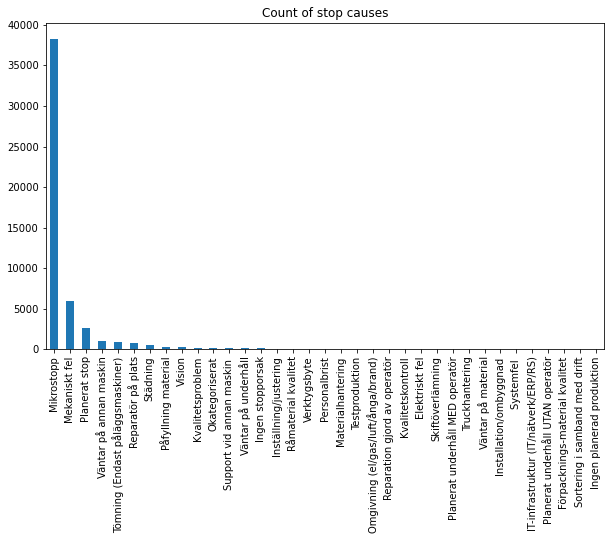

In [93]:
df_reclassify['Stopcause'].value_counts().plot(kind='bar', figsize=(10, 6), title = "Count of stop causes")

# Correlation

## For each month

In [52]:
df_permonth = df_reclassify.groupby(['month', 'Stopcause'])['Stopcause'].count().unstack().fillna(0)

In [57]:
df_permonth

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

Text(0, 0.5, 'Monthly count')

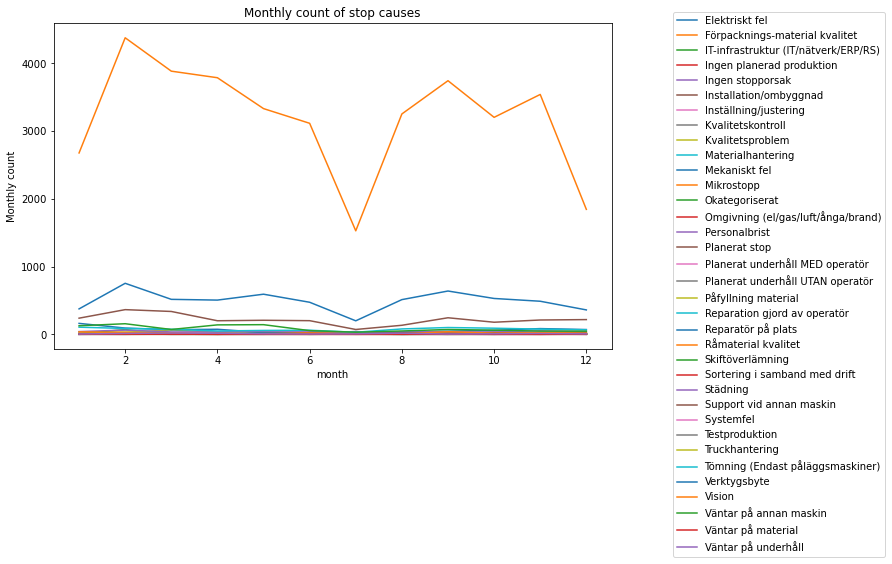

In [88]:
# With Mikrostopp
lines = df_permonth.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Monthly count of stop causes")
plt.ylabel("Monthly count")

Text(0, 0.5, 'Monthly count')

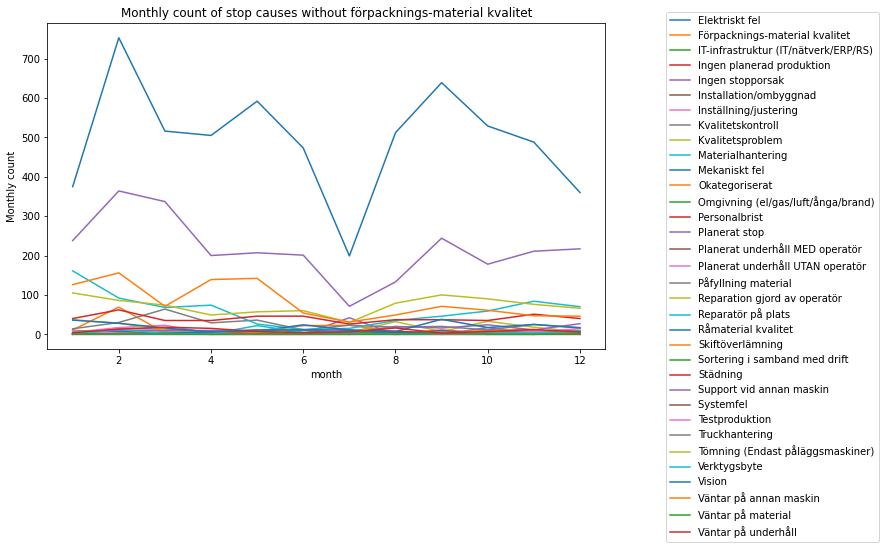

In [87]:
# Without förpacknings-material kvalitet
df_permonth_drop = df_permonth.drop(columns=['Mikrostopp'])
lines = df_permonth_drop.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Monthly count of stop causes without förpacknings-material kvalitet")
plt.ylabel("Monthly count")

In [89]:
def calculate_correlation(data):
    corr = data.corr()
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.figure(figsize=(10,6))
    plt.show()

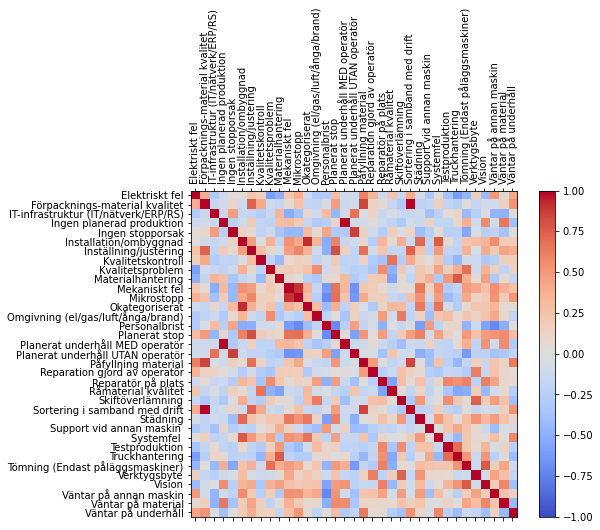

<Figure size 720x432 with 0 Axes>

In [90]:
calculate_correlation(df_permonth)


In [75]:
df_pershift = df_reclassify.groupby(['Workshift', 'Stopcause'])['Stopcause'].count().unstack().fillna(0)

Text(0, 0.5, 'Count per workshift')

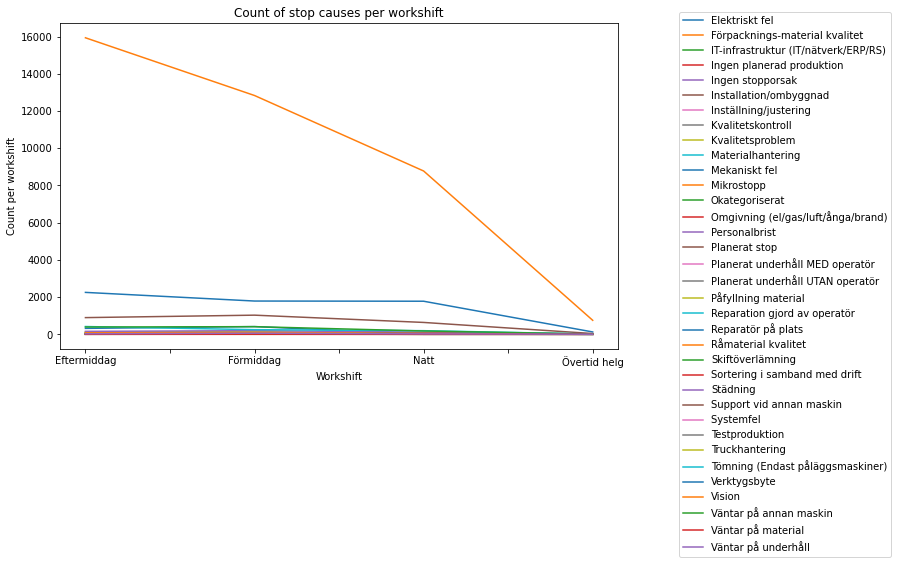

In [86]:
# With Mikrostopp
lines = df_pershift.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Count of stop causes per workshift")
plt.ylabel("Count per workshift")

Text(0, 0.5, 'Count per workshift')

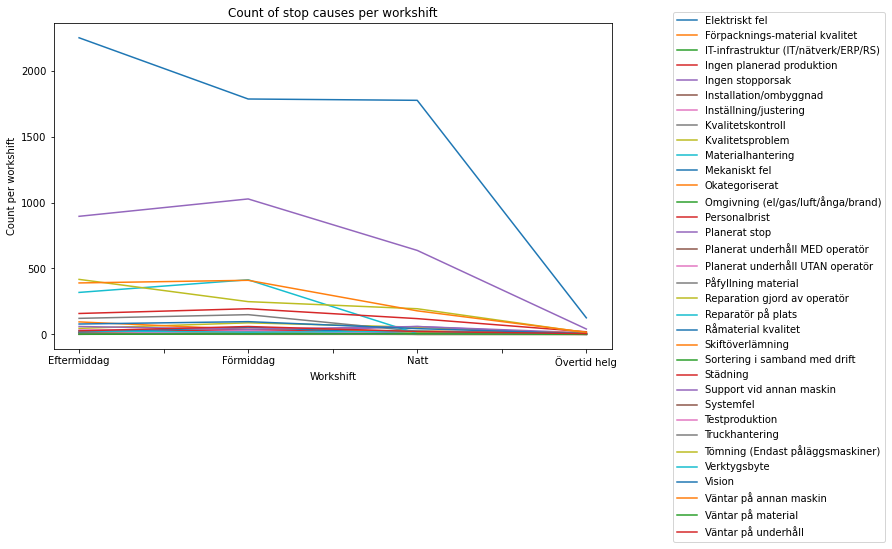

In [84]:
# Without förpacknings-material kvalitet
df_pershift_drop = df_pershift.drop(columns=['Mikrostopp'])
lines = df_pershift_drop.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Count of stop causes per workshift")
plt.ylabel("Count per workshift")

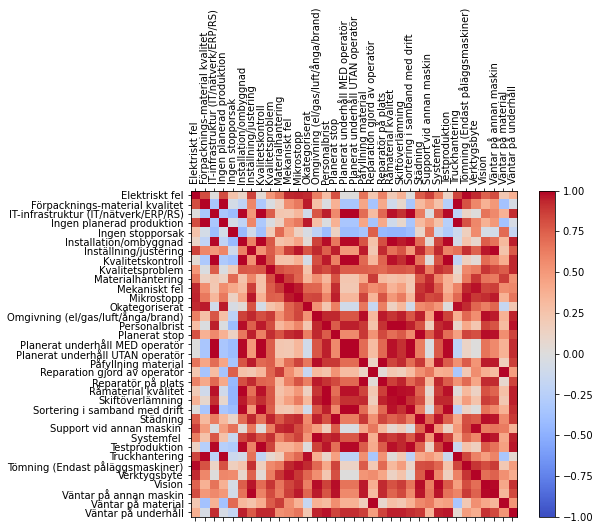

<Figure size 720x432 with 0 Axes>

In [91]:
calculate_correlation(df_pershift)

## Statistical test

In [ ]:
# classify stopcause with excel file
# encode the stopcause
# implement test

In [18]:
from sklearn import preprocessing

def encoder(dataframe):
    le = preprocessing.LabelEncoder()
    le.fit(dataframe['Stopcause'])
    le.transform(dataframe['Stopcause'])
    dataframe["encoded_stopcause"] = le.transform(dataframe['Stopcause'])
    return dataframe

In [46]:
df_reclassify = encoder(df_reclassify)
df_reclassify.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day,encoded_stopcause
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2,10,12
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2,10,12
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2,10,11
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2,10,11
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2,10,12


In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform one-way ANOVA, check whether PR(>F) is smaller than 0.05
model = ols('encoded_stopcause ~ C(month) + C(day) + C(Workshift)'
            , data=df_reclassify).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(month),5.174646e+03,11.0,22.697116,4.335503e-47
C(day),3.907081e+03,30.0,6.283678,7.733877e-25
C(Workshift),2.179956e+03,3.0,35.059772,1.259970e-22
Residual,1.070813e+06,51665.0,NaN,NaN
